In [7]:
import sys, os
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *
from simulation.population_sim import LensingObservationWithSubhalos

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Load Gaussian mean and covariance generated in notebook `1. Euclid-Properties.ipynb`
sim_mvgauss = np.load("../../simulation/data/sim_mvgauss.npz")

13.6644546061 283.419341409 1.65369279496 -0.336629052279 -0.0502160826767 81.2970286818


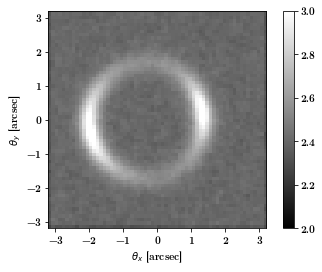

In [127]:
# Generate single lensing sample
# Fix source parameters and consider only spherical hosts

lo = LensingObservationWithSubhalos(sim_mvgauss_mean=sim_mvgauss['mean'], sim_mvgauss_cov=sim_mvgauss['cov'],
                                    M_200_sigma_v_scatter=False,   
                                    spherical_host=1,
                                    fix_source=1, beta=-1.9
)

v_min = 2.
v_max = 3.

plt.imshow(np.log10(lo.image_poiss_psf),
        vmin=v_min,
        vmax=v_max,
        cmap='gist_gray',
        extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
        origin="lower"
)
plt.colorbar()

plt.xlabel(r"$\theta_x$ [arcsec]")
plt.ylabel(r"$\theta_y$ [arcsec]")

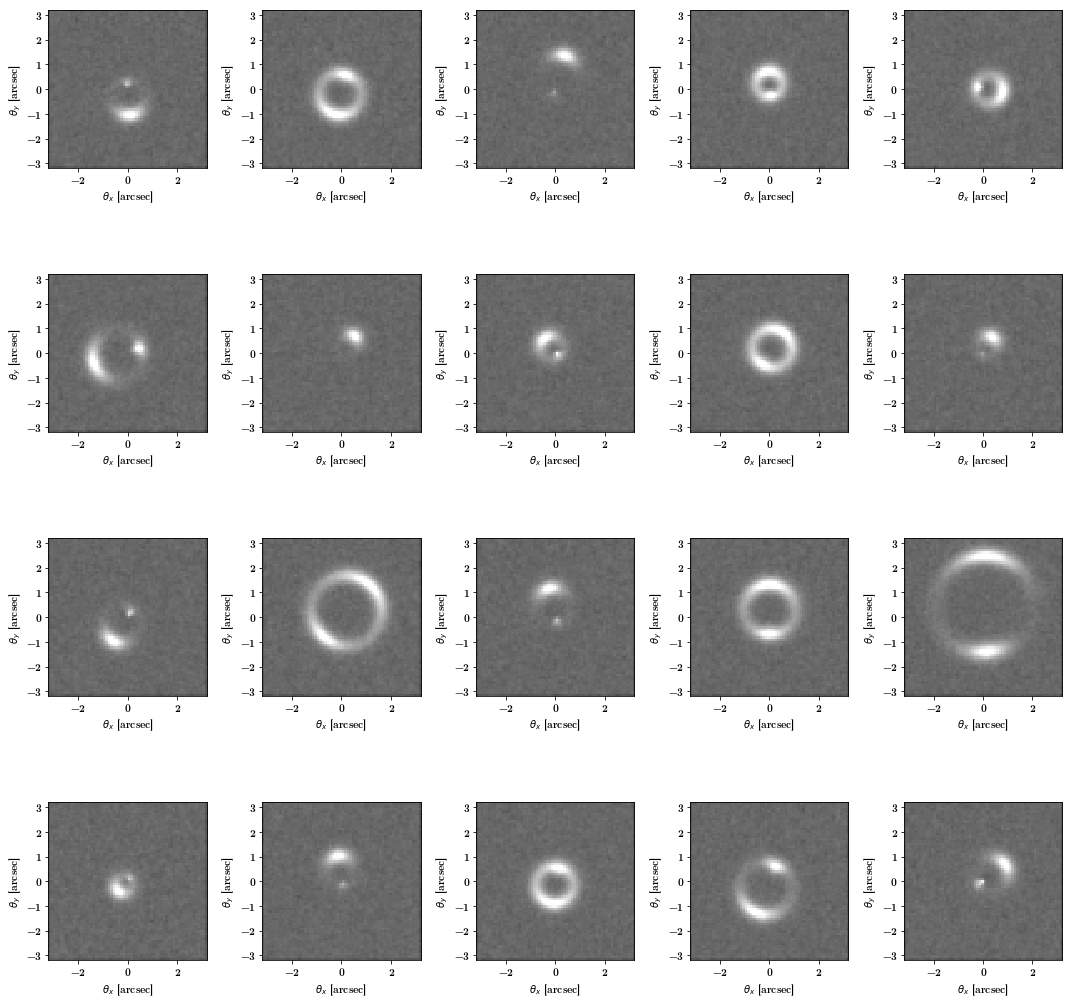

In [4]:
n_mc = 20

f, ax = plt.subplots(int(n_mc / 5), 5,figsize=(15,15))

v_min = 2.
v_max = 3.

for i_mc in range(n_mc):
    
    i_x, i_y = divmod(i_mc, 5)

    # Fix source parameters and consider only spherical hosts

    lo = LensingObservationWithSubhalos(sim_mvgauss_mean=sim_mvgauss['mean'], sim_mvgauss_cov=sim_mvgauss['cov'], 
                                       spherical_host=1,
                                       fix_source=1)

    ax[i_x, i_y].imshow(np.log10(lo.image_poiss_psf),
            vmin=v_min,
            vmax=v_max,
            cmap='gist_gray',
            extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
            origin="lower"
    )
    
    ax[i_x, i_y].set_xlabel(r"$\theta_x$ [arcsec]")
    ax[i_x, i_y].set_ylabel(r"$\theta_y$ [arcsec]")

plt.tight_layout()